In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [40]:
print(x_train_full.shape,y_train_full.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


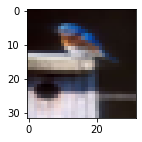

In [41]:
i=13
plt.figure(figsize=(2,2))
plt.imshow(x_train_full[i])
plt.show()

In [42]:
y_train_full[i]

array([2], dtype=uint8)

In [43]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [44]:
# take out a validation set out of training data
x_val=x_train_full[:5000]/255
x_train=x_train_full[5000:]/255
y_val=y_train_full[:5000]
y_train=y_train_full[5000:]
x_test=x_test/255


In [45]:
# Build a simple ANN model
tf.compat.v1.reset_default_graph()
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
model.add(keras.layers.Dense(300,activation='relu'))
#model.add(keras.layers.Dense(300,activation='relu',kernel_initializer="he_normal"))      # he_normalisation
#model.add(keras.layers.Dense(300,activation='selu',kernel_initializer="lecun_normal"))   # lecun_normal
#model.add(keras.layers.Dense(300,activation=keras.layers.LeakyReLU(alpha=0.2),kernel_initializer="he_normal"))
model.add(keras.layers.Dense(100,activation='relu'))
#he_avg_init=keras.initializers.VarianceScaling(scale=2,mode="fan_avg",distribution='uniform')
#model.add(keras.layers.Dense(100,activation='relu',kernel_initializer=he_avg_init))
model.add(keras.layers.Dense(10,activation='softmax'))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [47]:
input_layer=model.get_layer('flatten')
hidden1=model.get_layer('dense')
hidden2=model.get_layer('dense_1')
output_layer=model.get_layer('dense_2')

In [67]:
#compile the model ans specify the optimiser and accuracy metric
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='sgd')

In [68]:
# fit the model by specifying training and validation dataset
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1407/1407 [==============================] - 16s 8ms/step - loss: 1.7568 - accuracy: 0.3882 - val_loss: 1.5515 - val_accuracy: 0.4534
Epoch 2/30
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5320 - accuracy: 0.4589 - val_loss: 1.5035 - val_accuracy: 0.4718
Epoch 3/30
1407/1407 [==============================] - 12s 8ms/step - loss: 1.4547 - accuracy: 0.4868 - val_loss: 1.4387 - val_accuracy: 0.4932
Epoch 4/30
1407/1407 [==============================] - 12s 9ms/step - loss: 1.3964 - accuracy: 0.5097 - val_loss: 1.4030 - val_accuracy: 0.5108
Epoch 5/30
1407/1407 [==============================] - 12s 9ms/step - loss: 1.3452 - accuracy: 0.5248 - val_loss: 1.4024 - val_accuracy: 0.5170
Epoch 6/30
1407/1407 [==============================] - 13s 9ms/step - loss: 1.3086 - accuracy: 0.5395 - val_loss: 1.4046 - val_accuracy: 0.5104
Epoch 7/30
1407/1407 [==============================] - 14s 10ms/step - loss: 1.2712 - accuracy: 0.5527 - val_loss: 1.3680 - val_a

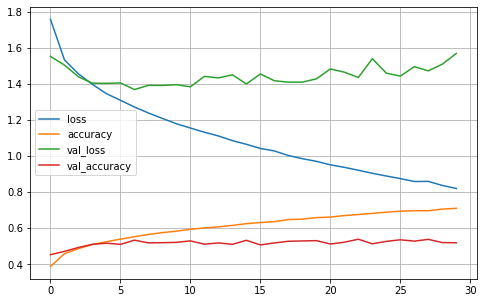

In [70]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)             # set the vertical range to [0-1]
plt.show()

In [71]:
# Evaluate model on test set
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5971 - accuracy: 0.5076


[1.5971007347106934, 0.5076000094413757]

In [74]:
# pickle above model
import pickle
pickle.dump(model,open('model.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\dense
......vars
.........0
...layers\dense\activation
......vars
...layers\dense_1
......vars
.........0
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-30 16:59:41         3847
metadata.json           

In [16]:
# predict class for test set
x_new=x_test[:2]
y_prob=model.predict(x_new)
y_prob

1/1 [==============================] - 0s 265ms/step


array([[2.3427566e-03, 3.0197687e-03, 4.8479390e-01, 1.8784660e-01,
        2.7449051e-01, 3.4394547e-02, 7.1196742e-03, 1.8709578e-03,
        3.6262008e-03, 4.9509964e-04],
       [6.8745362e-03, 7.9962909e-01, 9.2810094e-03, 2.3348791e-04,
        1.0822525e-03, 5.7591137e-04, 1.3703784e-04, 5.9648504e-04,
        7.0988633e-02, 1.1060156e-01]], dtype=float32)

In [17]:
y_class=np.argmax(y_prob,axis=1)
y_class

array([2, 1], dtype=int64)

In [18]:
y_test[0]

array([3], dtype=uint8)

In [19]:
y_test[1]

array([8], dtype=uint8)

#### Improve the model by hyperparameter tuning

In [20]:
# create a function that will build and compile a keras model,given a set of hyperparameters
def build_model(n_hidden,n_neurons,learning_rate,input_shape=[32,32,3]):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
    model.add(keras.layers.Dense(10,activation="softmax"))
    model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='sgd')
    return model
    
    
    

In [21]:
keras_class=keras.wrappers.scikit_learn.KerasClassifier(build_model)

C:\Users\ShefaliGupta\AppData\Local\Temp\ipykernel_13720\805916577.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_class=keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [22]:
#keras_class.fit(x_train,y_train,epochs=100,validation_data=(x_val,y_val),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [23]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [27]:
param_distribution={"n_hidden":[0,1,2,3],"n_neurons":np.arange(10,100),"learning_rate":reciprocal(3e-4,3e-2)}

In [28]:
rdn_search_cv=RandomizedSearchCV(keras_class,param_distribution,n_iter=10,cv=3)
rdn_search_cv.fit(x_train,y_train,epochs=3,validation_data=(x_val,y_val),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/3
938/938 [==============================] - 5s 4ms/step - loss: 1.9902 - accuracy: 0.2849 - val_loss: 1.9166 - val_accuracy: 0.3030
Epoch 2/3
938/938 [==============================] - 3s 4ms/step - loss: 1.8692 - accuracy: 0.3401 - val_loss: 1.8627 - val_accuracy: 0.3330
Epoch 3/3
469/469 [==============================] - 2s 3ms/step - loss: 1.8905 - accuracy: 0.3253
Epoch 1/3
938/938 [==============================] - 5s 4ms/step - loss: 2.0005 - accuracy: 0.2800 - val_loss: 2.0360 - val_accuracy: 0.2850
Epoch 2/3
938/938 [==============================] - 4s 4ms/step - loss: 1.8778 - accuracy: 0.3352 - val_loss: 1.8521 - val_accuracy: 0.3450
Epoch 3/3
469/469 [==============================] - 2s 3ms/step - loss: 1.8974 - accuracy: 0.3242
Epoch 1/3
938/938 [==============================] - 5s 4ms/step - loss: 1.9864 - accuracy: 0.2842 - val_loss: 1.9770 - val_accuracy: 0.2884
Epoch 2/3
938/938 [==============================] - 4s 4ms/step - loss: 1.8694 - accuracy: 0.342

938/938 [==============================] - 7s 6ms/step - loss: 1.9878 - accuracy: 0.2771 - val_loss: 1.8246 - val_accuracy: 0.3446
Epoch 2/3
938/938 [==============================] - 6s 6ms/step - loss: 1.8031 - accuracy: 0.3565 - val_loss: 1.8404 - val_accuracy: 0.3434
Epoch 3/3
469/469 [==============================] - 2s 3ms/step - loss: 1.6982 - accuracy: 0.3985
Epoch 1/3
938/938 [==============================] - 8s 7ms/step - loss: 1.9761 - accuracy: 0.2821 - val_loss: 1.8492 - val_accuracy: 0.3188
Epoch 2/3
938/938 [==============================] - 6s 6ms/step - loss: 1.7907 - accuracy: 0.3619 - val_loss: 1.7808 - val_accuracy: 0.3572
Epoch 3/3
469/469 [==============================] - 2s 3ms/step - loss: 1.7971 - accuracy: 0.3687
Epoch 1/3
938/938 [==============================] - 7s 6ms/step - loss: 2.0065 - accuracy: 0.2645 - val_loss: 1.8470 - val_accuracy: 0.3294
Epoch 2/3
938/938 [==============================] - 5s 5ms/step - loss: 1.8257 - accuracy: 0.3412 - val_lo

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000175FAD8EAC0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001762CCEE6A0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [29]:
rdn_search_cv.best_params_

{'learning_rate': 0.002759429090155563, 'n_hidden': 2, 'n_neurons': 97}

In [30]:
reciprocal(3e-4,3e-2)

#### Convert 3D image to a 2D image and apply ANN Deep Neural Network on it

In [46]:
x_train_full_2D=np.mean(x_train_full, axis=3)
x_test_2D=np.mean(x_test,axis=3)

In [49]:
print(x_train_full.shape,x_train_full_2D.shape)
print(x_test.shape,x_test_2D.shape)
print(y_train_full.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 32, 32)
(10000, 32, 32, 3) (10000, 32, 32)
(50000, 1) (10000, 1)


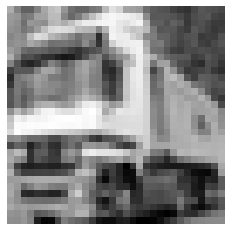

In [48]:
# Display the 2D image using Matplotlib
plt.imshow(x_train_full_2D[1], cmap='gray')
plt.axis('off')
plt.show()

In [50]:
# take out a validation set out of training data
x_val_2D=x_train_full_2D[:5000]/255
x_train_2D=x_train_full_2D[5000:]/255
y_val=y_train_full[:5000]
y_train=y_train_full[5000:]
x_test_2D=x_test_2D/255

In [52]:
# Build a simple ANN model
tf.compat.v1.reset_default_graph()
model1=keras.Sequential()
model1.add(keras.layers.Flatten(input_shape=[32,32]))
model1.add(keras.layers.Dense(300,activation='relu'))
model1.add(keras.layers.Dense(100,activation='relu'))
model1.add(keras.layers.Dense(10,activation='softmax'))
model1.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history3=model1.fit(x_train_2D,y_train,epochs=30,validation_data=[x_val_2D,y_val])

Epoch 1/30
1407/1407 [==============================] - 11s 7ms/step - loss: 2.0741 - accuracy: 0.2487 - val_loss: 2.0383 - val_accuracy: 0.2626
Epoch 2/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9484 - accuracy: 0.3114 - val_loss: 1.9472 - val_accuracy: 0.2986
Epoch 3/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8780 - accuracy: 0.3392 - val_loss: 1.8876 - val_accuracy: 0.3260
Epoch 4/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8270 - accuracy: 0.3549 - val_loss: 1.8822 - val_accuracy: 0.3320
Epoch 5/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7899 - accuracy: 0.3682 - val_loss: 1.8482 - val_accuracy: 0.3538
Epoch 6/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7598 - accuracy: 0.3773 - val_loss: 1.7992 - val_accuracy: 0.3618
Epoch 7/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7321 - accuracy: 0.3891 - val_loss: 1.7381 - val_accuracy